In [1]:
import xarray as xr
import numpy as np
from pycontrails.core.met import MetDataArray, MetDataset
from pycontrails.ext.flight_gen import FlightGen
import pycontrails.models.boxmodel.boxm as boxm

In [2]:
nc = xr.open_dataset("chem.nc")

/home/ktait98/miniconda3/envs/contrails/lib/python3.12/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
nc = MetDataset(nc)
nc

MetDataset with data:

<xarray.Dataset> Size: 153MB
Dimensions:       (level: 3, longitude: 5, latitude: 5, time: 288,
                   species: 218, photol_params: 57, photol_coeffs: 96,
                   therm_coeffs: 510, emissions: 2)
Coordinates:
  * level         (level) float64 24B 193.3 209.2 226.3
  * longitude     (longitude) float64 40B -1.0 -0.8 -0.6 -0.4 -0.2
  * latitude      (latitude) float64 40B -1.0 -0.8 -0.6 -0.4 -0.2
  * time          (time) datetime64[ns] 2kB 2022-03-02T07:00:00 ... 2022-03-0...
    air_pressure  (level) float64 24B 1.933e+04 2.092e+04 2.263e+04
    altitude      (level) float64 24B 1.2e+04 1.15e+04 1.1e+04
Dimensions without coordinates: species, photol_params, photol_coeffs,
                                therm_coeffs, emissions
Data variables:
    Y             (longitude, latitude, level, time, species) float64 38MB ...
    SZA           (longitude, latitude, level, time) float64 173kB ...
    J             (longitude, latitude, level, time, photol_params) float64 10MB ...
    DJ            (longitude, latitude, level, time, photol_coeffs) float64 17MB ...
    RC            (longitude, latitude, level, time, therm_coeffs) float64 88MB ...
    EMI           (longitude, latitude, level, time, emissions) float64 346kB ...

In [10]:
nc["EMI"].data.isel(emissions=0).values.max()

0.0

KeyboardInterrupt: 

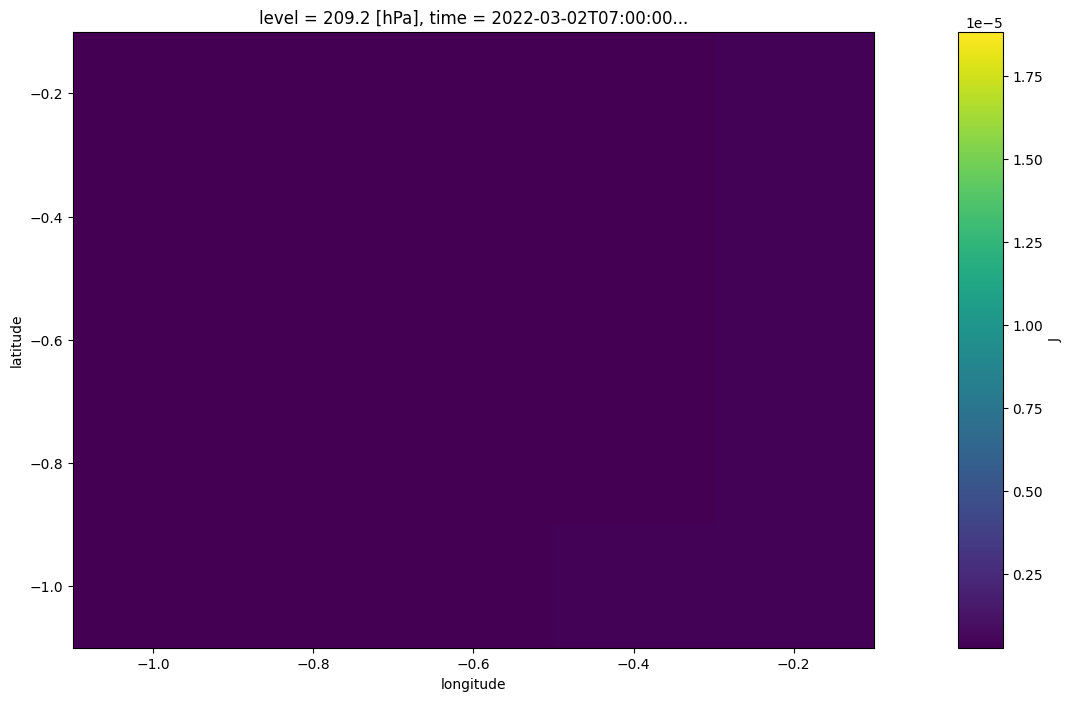

In [11]:
boxm.anim_chem(nc["J"].data.isel(level=1, photol_params=0, time=slice(0,30)))